#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 4
### Due: Monday, Feb 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 21th.

---

## Problem 1

Let $\mu$ be a real number. Let $\sigma$ be a strictly positive real number.

Show that for a Gaussian distribution $\mathscr{N}(\mu,\sigma)$, the mode is its mean $\mu$.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

The mode is the most probable value, or the value that is the peak of the curve. So all we have to do is show that $\mu$ is the peak of the Gaussian distribution. 

The Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

The value in the exponent of the e term is $\frac{-(x-\mu)^2}{2\sigma^2}$ and the negative outside $(x-\mu)^2$ means that there is no way that the term is positive. Thus the largest value that the term can get to is 0. This is when x = $\mu$. The exponential term is at its max when the exponent is 0 and the term is thus 1 as otherwise the exponent would be negative making the term be less than 1. The rest of the equation is positive meaning that x = $\mu$ is the max of the curve and thus also the mode.


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with the given $\mu$ and $\sigma$. a) Plot the distribution, b) give 10 random draws, along with the pdf at each of the draws. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 130? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?



### Solution



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

#### 1)

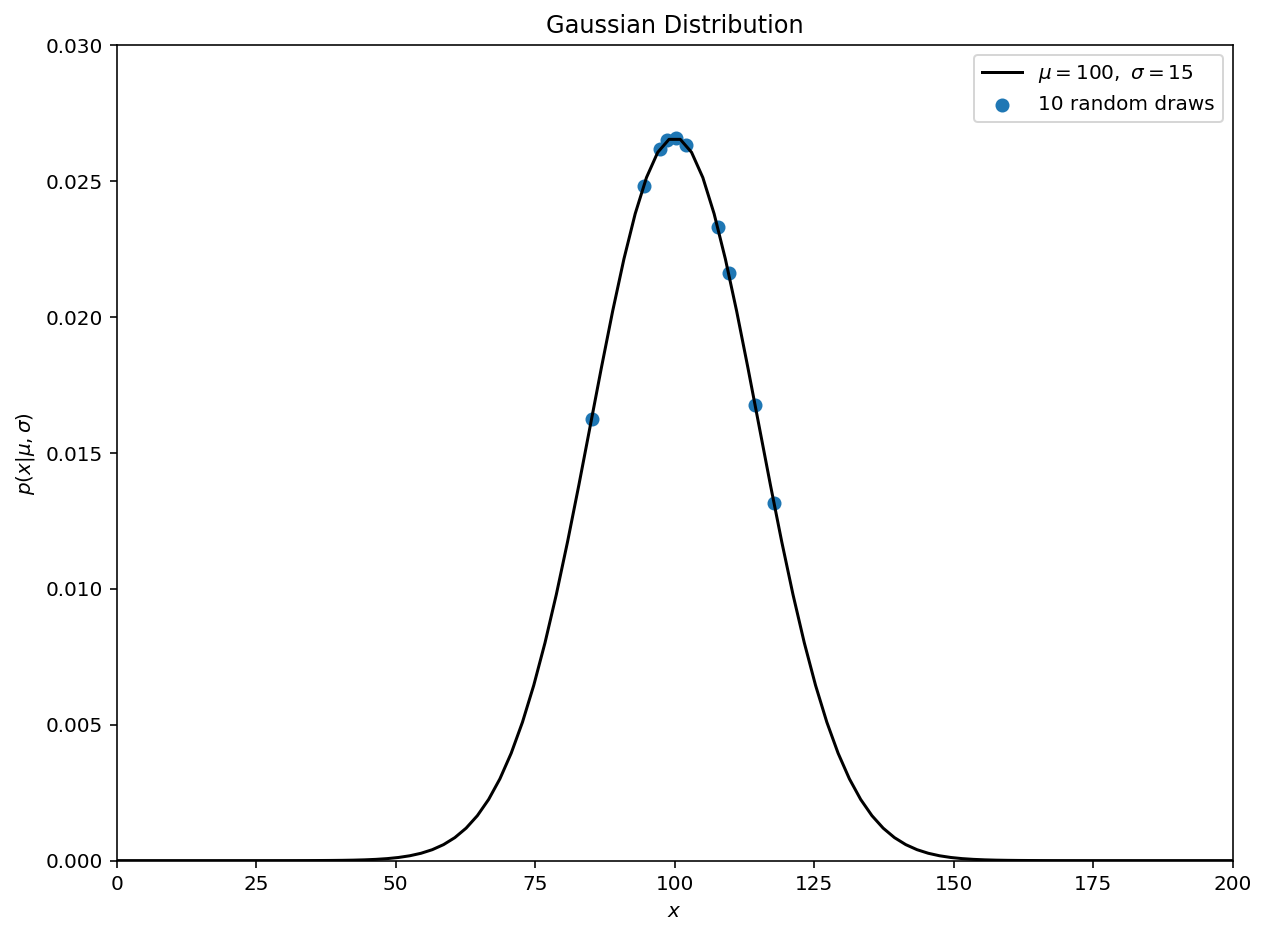

In [5]:
distG = scipy.stats.norm(loc=100,scale=15) # Normal distribution with mean = 100, stdev = 15

xgrid = np.linspace(0,200,num=100) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

draws = distG.rvs(10)

# actual plotting
fig, ax = plt.subplots(figsize=(10, 7.5))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={100},\ \sigma={15}$')
plt.scatter(draws, distG.pdf(draws), label='10 random draws')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()


### 2)

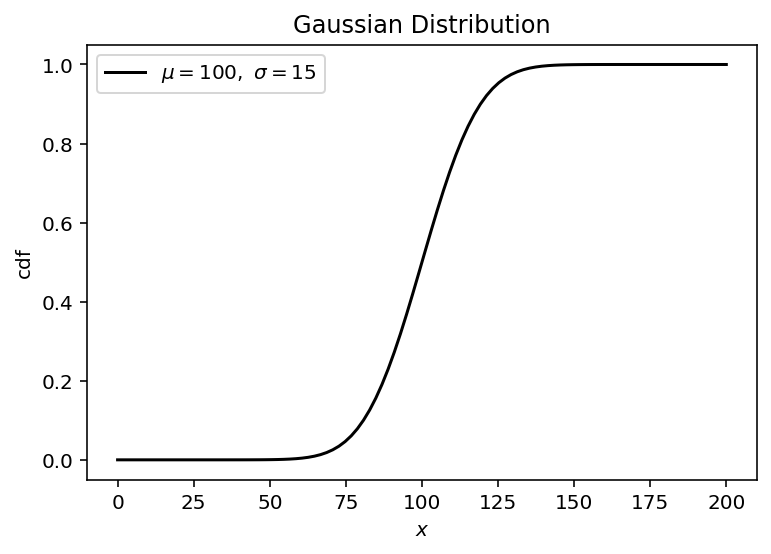

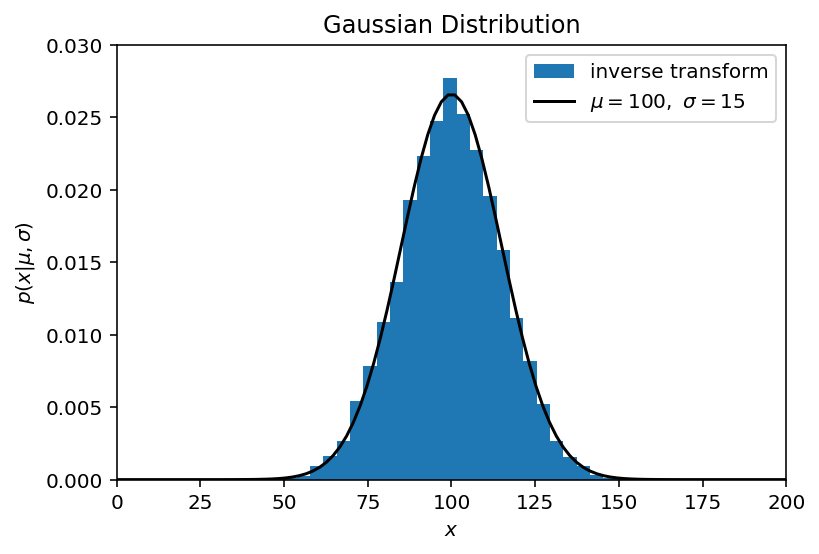

In [15]:
plt.plot(xgrid, distG.cdf(xgrid), ls='-', c='black', 
         label=f'$\mu={100},\ \sigma={15}$')
plt.xlabel('$x$')
plt.ylabel(r'cdf')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()


plt.hist(distG.ppf(np.random.uniform(size=10000)), bins=30, density=True, label='inverse transform')
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={100},\ \sigma={15}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()





### 3)

In [17]:
print("fraction of people with IQ > 130: " + str(1-distG.cdf(130)))

fraction of people with IQ > 130: 0.02275013194817921


### 4)

In [20]:
print("one in a million IQ: " + str(distG.ppf(1-(1/1000000))))

one in a million IQ: 171.3013646322563
